In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.cross_validation import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

from IPython.display import Image
import pydot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../assets/trainWeather.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head(1)

,Date,Species,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Tmax_x,Tmin_x,Tavg_x,Depart_x,DewPoint_x,WetBulb_x,Heat_x,Cool_x,Sunrise_x,Sunset_x,Depth_x,Water1_x,SnowFall_x,PrecipTotal_x,StnPressure_x,SeaLevel_x,ResultSpeed_x,ResultDir_x,AvgSpeed_x,Tmax_y,Tmin_y,Tavg_y,Depart_y,DewPoint_y,WetBulb_y,Heat_y,Cool_y,Sunrise_y,Sunset_y,Depth_y,Water1_y,SnowFall_y,PrecipTotal_y,StnPressure_y,SeaLevel_y,ResultSpeed_y,ResultDir_y,AvgSpeed_y
0,2007-05-29,0,41.95469,-87.800991,9,1,0,88,60,74,10,58,65,0,9,421,1917,0,0,0.0,0.00,29.39,30.11,5.8,18,6.5,88,65,77,0,59,66,0,12,0,0,0,0,0,0.00,29.44,30.09,5.8,16,7.4


In [4]:
# df['Date'] = pd.to_datetime(df['Date'])

In [5]:
y = df['WnvPresent']
X = df.drop(['WnvPresent','Latitude','Longitude'], axis = 1)

In [6]:
X['SnowFall_x'] = X['SnowFall_x'].map({'  T' : 1} )
X['PrecipTotal_x'] = X['PrecipTotal_x'].map({'  T' : 0} )
X['PrecipTotal_y'] = X['PrecipTotal_y'].map({'  T' : 0} )

In [7]:
X['PrecipTotal_y'].fillna(X['PrecipTotal_y'].mean(), inplace=True)
X['PrecipTotal_x'].fillna(X['PrecipTotal_x'].mean(), inplace=True)
X['SnowFall_x'].fillna(X['SnowFall_x'].mean(), inplace=True)

In [8]:
# Scale year, runtime, and gross columns to values between 0 and 1. Our minimum will now be 0 and max will be 1

scale = StandardScaler()

X.ix[:,1:] = scale.fit_transform(X.ix[:,1:].as_matrix())

In [9]:
def create_month(x):
    return x.split('-')[1]

def create_day(x):
    return x.split('-')[2]

X['month'] = X.Date.apply(create_month)
X['day'] = X.Date.apply(create_day)
# test['month'] = test.Date.apply(create_month)
# test['day'] = test.Date.apply(create_day)

In [10]:
X.drop(['Date'], axis=1, inplace=True)

In [11]:
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [294]:
#Initiate GridSearch - it just may be that it's not max_depth that will get us the best model, but a certain
#combination of the model's possible parameters

PARAMETERS = {'max_depth':[1,2,3,4,5,6], 'max_features':[1,2,3,4], 
              'max_leaf_nodes':[5,6,7,8,9,10], 'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[1,2,3,4]}
SCORING = 'mean_squared_error'

In [14]:
#We use Grid Search to find optimal values for each paramter

# clfModel = DecisionTreeClassifier()
# clf = GridSearchCV(clfModel, PARAMETERS, scoring=SCORING, n_jobs=-1)
# clf.fit(X, y)

# #After completion, show the final best results and scores
# print clf.best_estimator_
# print clf.best_score_
# print np.sqrt(-clf.best_score_)

In [15]:
# GridSearch provides us with the optimal parameters, so we fit our model with those parameters

treeclf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=1, max_leaf_nodes=5, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=8, splitter='best')
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=1, max_leaf_nodes=5, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=8, splitter='best')

In [16]:
# rf = RandomForestClassifier()
# rfc = GridSearchCV(rf, PARAMETERS, scoring=SCORING, n_jobs=-1)
# rfc.fit(X, y)

# #After completion, show the final best results and scores
# print rfc.best_estimator_

In [17]:
# Fit the randForModel w/ GridSearch parameters
# Repeat steps below and compare accuracy and ROC score
# Create adaBoostClassifier and repeat process - take model with best ROC

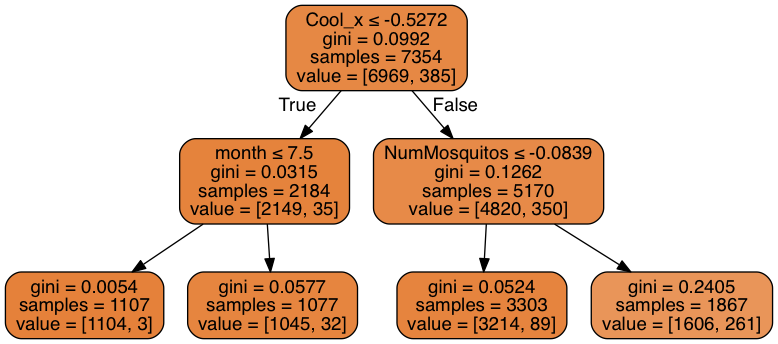

In [19]:
# Review this tree with our normal classifier, but explain why these aren't great, leading into our use of ensemble
# in the steps below

dot_data = StringIO()  
export_graphviz(treeclf, out_file=dot_data,  
                feature_names=X.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [20]:
# predict class labels for the test set
predicted = treeclf.predict(X_test)
print predicted

[0 0 0 ..., 0 0 0]


In [21]:
# generate class probabilities - this will be useful for our confusion plot below
probs = treeclf.predict_proba(X_test)

In [22]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print CV_rfc.best_params_
print CV_rfc.best_estimator_

{'max_features': 'sqrt', 'n_estimators': 200}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)


In [23]:
rfClf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
            oob_score=True, random_state=15, verbose=0, warm_start=False)

rfClf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
            oob_score=True, random_state=15, verbose=0, warm_start=False)

In [24]:
# Let's see if we can improve these metrics with a random forest

# predict class labels for the test set

predictedRf = rfClf.predict(X_test)
print predictedRf

# generate class probabilities - this will be useful for our confusion plot below

probsRf = rfClf.predict_proba(X_test)

[0 1 0 ..., 0 0 0]


In [18]:
# compute the feature importances

pd.DataFrame({'Feature':X.columns,
              'Importance':treeclf.feature_importances_}).sort_values('Importance', ascending=False).head(6)

,Feature,Importance
2,NumMosquitos,0.771558
10,Cool_x,0.208226
41,month,0.020216
0,Species,0.000000
32,Depth_y,0.000000
25,Depart_y,0.000000


In [317]:
pd.DataFrame({'Feature':X.columns,
              'Importance':rfClf.feature_importances_}).sort_values('Importance', ascending=False).head(6)

,Feature,Importance
2,NumMosquitos,0.627867
1,AddressAccuracy,0.113171
0,Species,0.083941
11,Sunrise_x,0.018714
12,Sunset_x,0.018347
41,month,0.009428


In [319]:
# Much better - AUC went all the way up to.81
# Now let's check adadBoostClassifier in the same process and make
# probability dataframe with the best model and plot AUC scores for each

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [200, 700]}

abc = AdaBoostClassifier(base_estimator = treeclf)

# run grid search

abClf = GridSearchCV(abc, param_grid=param_grid, scoring = 'roc_auc')
abClf.fit(X_train, y_train)
print abClf.estimator

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=1, max_leaf_nodes=5, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=8, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)


In [320]:
# Let's see if we can improve these metrics with an adaboost classifier

abClf = AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=1, max_leaf_nodes=5, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=8, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=8)

abClf.fit(X_train, y_train)

# predict class labels for the test set

predictedAda = abClf.predict(X_test)
print predictedAda

# generate class probabilities - this will be useful for our confusion plot below

probsAda = abClf.predict_proba(X_test)

[0 0 0 ..., 0 0 0]


In [321]:
pd.DataFrame({'Feature':X.columns,
              'Importance':abClf.feature_importances_}).sort_values('Importance', ascending=False).head(6)

,Feature,Importance
2,NumMosquitos,0.588790
41,month,0.269539
10,Cool_x,0.141671
0,Species,0.000000
32,Depth_y,0.000000
25,Depart_y,0.000000


In [251]:
# generate evaluation metrics

print "The Decision Tree Classifier's accuracy score is", metrics.accuracy_score(y_test, predicted)
print "The Decision Tree Classifier's area under the curve is", metrics.roc_auc_score(y_test, probs[:, 1])
print ' '

print "The Random Forest Classifier's accuracy score is", metrics.accuracy_score(y_test, predictedRf)
print "The Random Forest Classifier's area under the curve is", metrics.roc_auc_score(y_test, probsRf[:, 1])
print ' '

print "The AdaBoost Classifier's accuracy score is", metrics.accuracy_score(y_test, predictedAda)
print "The AdaBoost Classifier's area under the curve is", metrics.roc_auc_score(y_test, probsAda[:, 1])

The Decision Tree Classifier's accuracy score is 0.947335025381
The Decision Tree Classifier's area under the curve is 0.755294789338
 
The Random Forest Classifier's accuracy score is 0.933375634518
The Random Forest Classifier's area under the curve is 0.808200316336
 
The AdaBoost Classifier's accuracy score is 0.947335025381
The AdaBoost Classifier's area under the curve is 0.842766242465


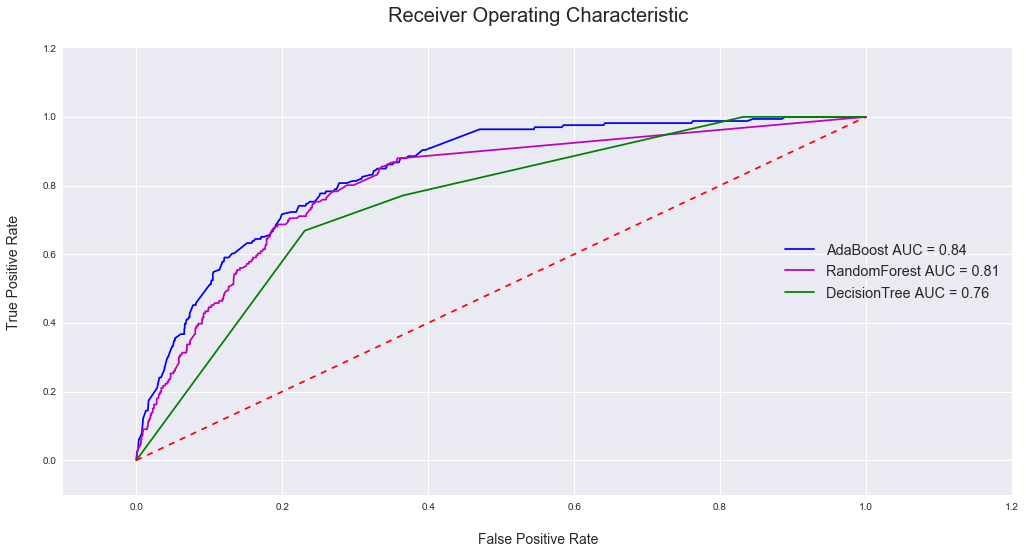

In [252]:
adaFalse_positive_rate, adaTrue_positive_rate, adaThresholds = metrics.roc_curve(y_test, probsAda[:, 1])
adaRoc_auc = metrics.auc(adaFalse_positive_rate, adaTrue_positive_rate)

rfFalse_positive_rate, rfTrue_positive_rate, rfThresholds = metrics.roc_curve(y_test, probsRf[:, 1])
rfRoc_auc = metrics.auc(rfFalse_positive_rate, rfTrue_positive_rate)

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, probs[:, 1])
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

plt.rcParams['figure.figsize']=17,8
plt.title('Receiver Operating Characteristic\n', fontsize=20)

plt.plot(adaFalse_positive_rate, adaTrue_positive_rate, 'b',
label='AdaBoost AUC = %0.2f'% adaRoc_auc)

plt.plot(rfFalse_positive_rate, rfTrue_positive_rate, 'm',
label='RandomForest AUC = %0.2f'% rfRoc_auc)

plt.plot(false_positive_rate, true_positive_rate, 'g',
label='DecisionTree AUC = %0.2f'% roc_auc)

plt.legend(loc=7, fontsize='x-large', )
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate\n', fontsize=14)
plt.xlabel('\nFalse Positive Rate', fontsize=14)
plt.show()

In [301]:
probDf = pd.DataFrame(probsRf, columns=['noWN', 'WN'])

In [302]:
probDf['actual'] = y_test

In [309]:
cmDf = probDf[['actual','noWN']]
threshold = 0.7

In [310]:
cmDf['predicted'] = [1 if i <= threshold else 0 for i in cmDf['noWN']]

In [311]:
def predLabel(row):
    if row['noWN'] >= threshold and row['actual'] == 1:
        return "FN"
    elif row['noWN'] >= threshold and row['actual'] == 0:
        return "TN"
    elif row['noWN'] < threshold and row['actual'] == 1:
        return "TP"
    else:
        return "FP"

In [312]:
#Apply the function above to create the column
cmDf['predVal'] = cmDf.apply (lambda row: predLabel (row),axis=1)

In [313]:
print pd.crosstab(
        cmDf['actual'],
        cmDf['predicted'], 
        rownames=['actual'])

predicted     0    1
actual              
0          2852  134
1           127   39


In [280]:
print confusion_matrix(y_test, predictedRf)

[[2919   67]
 [ 143   23]]


In [291]:
cmDf.head()

,actual,noWN,predicted,predVal
0,0,1.000000,0,TN
1,0,0.115714,1,FP
2,1,1.000000,0,FN
3,0,1.000000,0,TN
4,0,1.000000,0,TN


KeyboardInterrupt: 

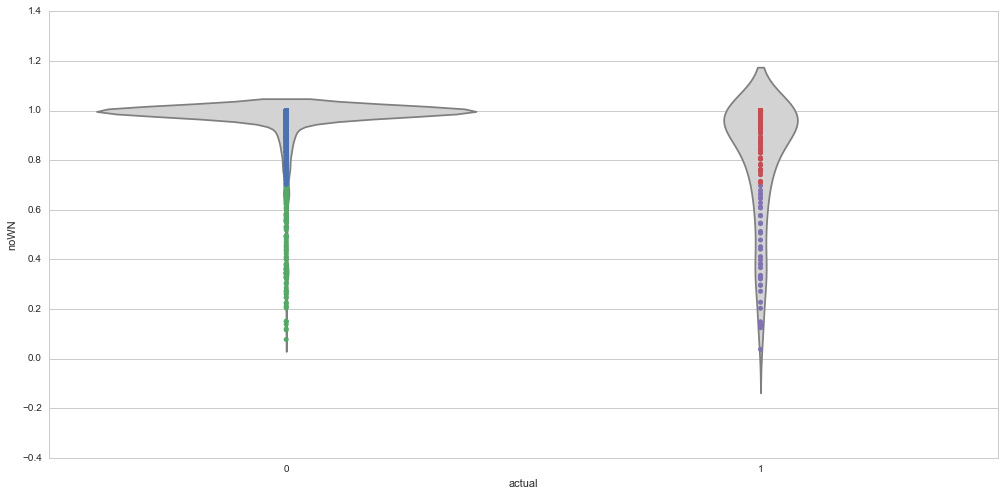

In [316]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=17,8
ax = sns.violinplot(x="actual", y="noWN", data=cmDf, inner=None, color="lightgray")
ax = sns.swarmplot(x="actual", y="noWN", hue="predVal", data=cmDf, edgecolor="gray")
ax.axes.set_title("Threshold at 0.3\n",fontsize=30)
ax.set_xlabel("\nActual Classification",fontsize=20)
ax.set_ylabel("Predicted Classification\n",fontsize=20)
ax.legend(title="Type", frameon=True, shadow=True, framealpha=0.9)
plt.plot([-1,2],[0.7,0.7],'r--')